## Olympics Data mini-project
Temple Elements of Data Science

In [1]:
# Enter your name as a string
name = "Fatma Betul Seker"

In [2]:
# Extra Python functionality to import
from datascience import *  # datascience Table 

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

### Data Sets
Athletes: Olympic_Data/athlete_events.csv
Source: Kaggle https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results

In [3]:
datafile = "Olympic_Data/athlete_events.csv"
athletes = Table.read_table(datafile).sort("Year",descending=True).where("Season","Winter")
athletes

ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
135570,Piotr ya,M,27,176,59,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",nan
135570,Piotr ya,M,27,176,59,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",nan
135500,Kristaps Zvejnieks,M,21,185,87,Latvia,LAT,2014 Winter,2014,Winter,Sochi,Alpine Skiing,Alpine Skiing Men's Slalom,nan
135500,Kristaps Zvejnieks,M,21,185,87,Latvia,LAT,2014 Winter,2014,Winter,Sochi,Alpine Skiing,Alpine Skiing Men's Giant Slalom,nan
135485,Stepan Olegovich Zuyev,M,25,189,90,Russia,RUS,2014 Winter,2014,Winter,Sochi,Alpine Skiing,Alpine Skiing Men's Slalom,nan
135485,Stepan Olegovich Zuyev,M,25,189,90,Russia,RUS,2014 Winter,2014,Winter,Sochi,Alpine Skiing,Alpine Skiing Men's Giant Slalom,nan
135485,Stepan Olegovich Zuyev,M,25,189,90,Russia,RUS,2014 Winter,2014,Winter,Sochi,Alpine Skiing,Alpine Skiing Men's Super G,nan
135365,Mats Andr Zuccarello-Aasen,M,26,171,74,Norway,NOR,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,nan
135343,Aleksandr Yuryevich Zubkov,M,39,189,102,Russia-1,RUS,2014 Winter,2014,Winter,Sochi,Bobsleigh,Bobsleigh Men's Four,Gold
135343,Aleksandr Yuryevich Zubkov,M,39,189,102,Russia-1,RUS,2014 Winter,2014,Winter,Sochi,Bobsleigh,Bobsleigh Men's Two,Gold


### Stage 1: Data exploration

### Ages of Athletes
Some ages are entered as <i>nan</i>.  <i>nan</i> is hard to work with so we will use a quick pandas command to remove these by converting the Table to a pandas dataframe,change <i>nan</i> to 0 and then convert the data back to a Table object. 

In [4]:
df = athletes.to_df() # Create pandas dataframe from Table object
df['Age'].fillna(0, inplace=True)
athletes = Table().from_df(df)

#### Q1: What is the earliest year for a Winter Olympics in this dataset?

In [5]:
min(athletes['Year'])

1924

Earliest year for a Winter Olympics is 1924 in the dataset.

#### Q2: Examine the distribution of the age of all Olympians with min, max, average, and plot with a histogram.

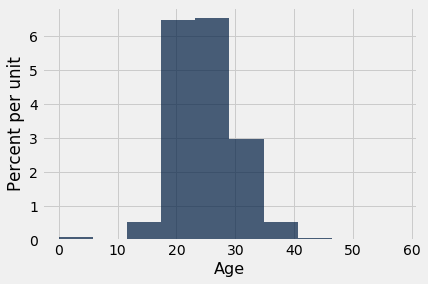

In [6]:
athletes.hist('Age')

#### Q3: Now examine the age distribution of only gold medal winners. Compare these distributions from question 2 and 3.

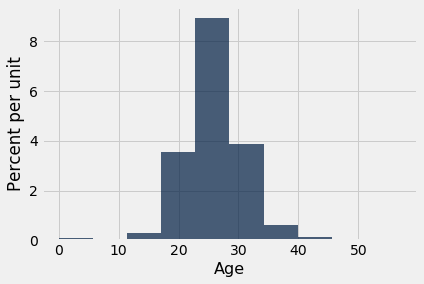

In [7]:
athletes.where('Medal', are.equal_to('Gold')).hist('Age')

Athletes younger than 24 were less likely to win Gold medal relative to the athletes older than 24.  

#### Q4: What are the top ten countries in number of athletes?

In [8]:
athletes.group("Team").sort("count",descending=True).take(np.arange(0,10))

Team,count
United States,3321
Canada,2590
Norway,2328
Sweden,2231
Italy,2209
Japan,2056
France,1967
Austria,1954
Germany,1948
Switzerland,1911


#### Q5: What are the top ten countries in number of Gold, silver, bronze medals, and total medals?  You should have four sets of top ten countries for each of the scenarios.  

In [9]:
# Gold Medals
athletes.where('Medal', are.equal_to('Gold')).group("Team").sort("count",descending=True).take(np.arange(0,10))

Team,count
Canada,289
Soviet Union,228
Norway,151
United States,141
Sweden,125
Germany,115
Russia,72
Austria,67
Finland,66
South Korea,50


In [10]:
# Silver Medals
athletes.where('Medal', are.equal_to('Silver')).group("Team").sort("count",descending=True).take(np.arange(0,10))

Team,count
United States,271
Canada,189
Norway,165
Finland,145
Sweden,126
Germany,114
Soviet Union,81
Czechoslovakia,81
Austria,80
Russia,73


In [11]:
# Bronz Medals
athletes.where('Medal', are.equal_to('Bronze')).group("Team").sort("count",descending=True).take(np.arange(0,10))

Team,count
Finland,215
Sweden,177
Norway,127
United States,121
Switzerland,97
Canada,97
Austria,97
Soviet Union,81
France,75
Czechoslovakia,75


In [12]:
# Total Medals
athletes.where('Medal', are.not_equal_to("nan")).group("Team").sort("count",descending=True).take(np.arange(0,10))

Team,count
Canada,575
United States,533
Norway,443
Sweden,428
Finland,426
Soviet Union,390
Germany,297
Austria,244
Russia,216
Switzerland,183


#### Q6: What are the top 5 sports in terms of number of athletes? 

In [13]:
athletes.group("Sport").sort("count",descending=True).take(np.arange(0,5))

Sport,count
Cross Country Skiing,9133
Alpine Skiing,8829
Speed Skating,5613
Ice Hockey,5456
Biathlon,4893


#### Q7: Which sports (top 5) have awarded the most medals?

In [14]:
athletes.where("Medal",are.not_equal_to("nan")).group("Sport").sort("count",descending=True).take(np.arange(0,5))

Sport,count
Ice Hockey,1503
Cross Country Skiing,776
Speed Skating,580
Alpine Skiing,428
Biathlon,408


#### Q8: Which sports (top 5) awarded the most medals in Lake Placid, New York (1980,  https://www.lakeplacid.com/do/activities/olympic-sites ).

In [15]:
athletes.where("Medal",are.not_equal_to("nan")).where('Year', are.equal_to(1980)).group("Sport").sort("count",descending=True).take(np.arange(0,5))

Sport,count
Ice Hockey,59
Cross Country Skiing,38
Speed Skating,28
Figure Skating,18
Bobsleigh,18


#### Q9: Remember medals are awarded to each participant on a team, how does this effect the results you found above?

Ice Hockey has the largest team size in the winter olympics. Each team has 17-22 athletes. That means in ice hokey 17-22 medals are distibuted for each medal type. 

### Stage 2: Time trends and comparative results

#### Q1: Plot the trend in number of athletes per year. 
Hint: athletes.group("Year").plot("Year","count")

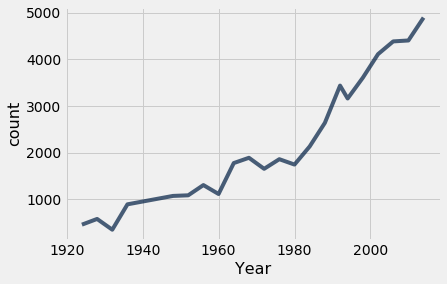

In [16]:
athletes.group("Year").plot("Year","count")

#### Q2: Plot the number of medals per year

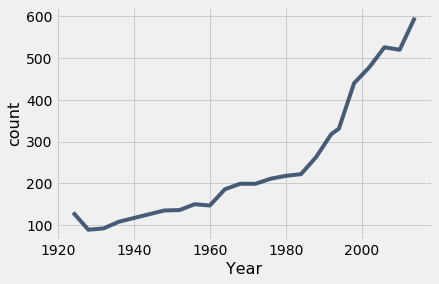

In [17]:
athletes.where('Medal', are.not_equal_to('nan')).group("Year").plot("Year","count")

#### Q3: Plot the number of gold medals per year excluding “Ice Hockey”, why hockey?

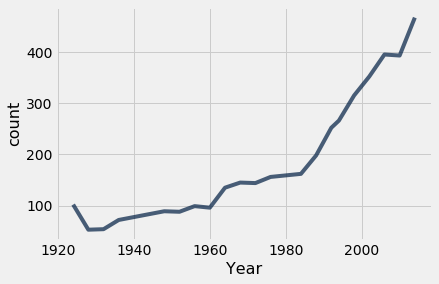

In [18]:
athletes.where('Sport', are.not_equal_to("Ice Hockey")).where('Medal', are.not_equal_to('nan')).group("Year").plot("Year","count")

Since the ice hockey is the most medal distributing sport in one shot, a small change in the ice hockey regulations could create large variations that distorts our analysis

#### Q4: Plot an overlay of gold, silver, and bronze medals as a function of year on the same plot excluding hockey.

In [19]:
allmedals = athletes.where('Sport', are.not_equal_to("Ice Hockey")).where('Medal', 
    are.not_equal_to('nan')).group("Year")

goldmedals = athletes.where('Sport', are.not_equal_to("Ice Hockey")).where('Medal', 
    are.equal_to('Gold')).group("Year")

silvermedals = athletes.where('Sport', are.not_equal_to("Ice Hockey")).where('Medal', 
    are.equal_to('Silver')).group("Year")

bronzemedals = athletes.where('Sport', are.not_equal_to("Ice Hockey")).where('Medal', 
    are.equal_to('Bronze')).group("Year")


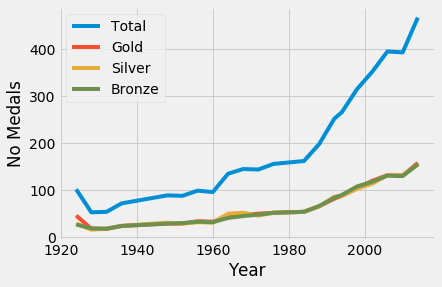

In [20]:
plt.plot(allmedals.column('Year'), allmedals.column('count'))
plt.plot(goldmedals.column('Year'), goldmedals.column('count'))
plt.plot(silvermedals.column('Year'), silvermedals.column('count'))
plt.plot(bronzemedals.column('Year'), bronzemedals.column('count'))
plt.xlabel('Year')
plt.ylabel('No Medals')

plt.legend(['Total', 'Gold', 'Silver', 'Bronze'], loc = 'upper left')

#### Q5: Compare the US and Norway medal counts as a function of year by overlaying their counts. 
Hint: Can overwrite athletes with just US and Norway data
athletes = athletes.where("Team","Norway").join("Year",athletes.where("Team","United States"))

In [21]:
# Answer to examine combined data use this panda trick to overwrite athletes table with US & Norway data only
df = df.loc[(df['Team'] == "United States") | (df['Team'] == "Norway" )] # Easy way to get 
athletes = Table().from_df(df) # Overwrite athletes Table object

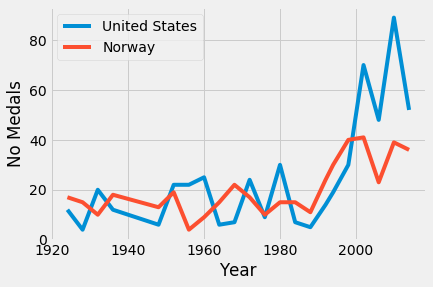

In [22]:
USmdls = athletes.where('Team', are.equal_to('United States')).where('Medal', are.not_equal_to('nan')).group('Year')
NORmdls = athletes.where('Team', are.equal_to('Norway')).where('Medal', are.not_equal_to('nan')).group('Year')

plt.plot(USmdls.column('Year'), USmdls.column('count'))
plt.plot(NORmdls.column('Year'), NORmdls.column('count'))

plt.xlabel('Year')
plt.ylabel('No Medals')

plt.legend(['United States', 'Norway'], loc = 'upper left')


#### Q6: Now use a scatter plot (.scatter() ) to look at the number of athletes per year for the US versus that for Norway. What trends do you see?

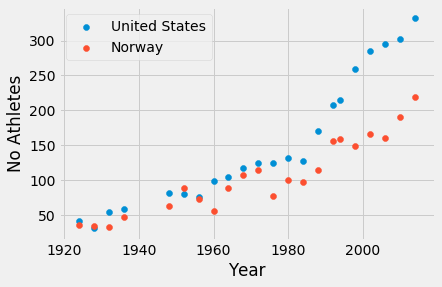

In [23]:
USathletes = athletes.where('Team', are.equal_to('United States')).group('Year')
NORathletes = athletes.where('Team', are.equal_to('Norway')).group('Year')

plt.scatter(USathletes.column('Year'), USathletes.column('count'))
plt.scatter(NORathletes.column('Year'), NORathletes.column('count'))

plt.xlabel('Year')
plt.ylabel('No Athletes')

plt.legend(['United States', 'Norway'], loc = 'upper left')



Number of athletes are increasing for both countries but since 1990 the no athletes of the US has increased more than Norway's. Medals are also similarly in the previous graph. 

#### Q7: Use a scatter to plot the number of athletes for each country versus the number of medals. 

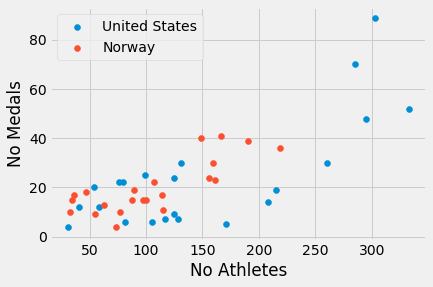

In [24]:
US = USathletes.join('Year', USmdls)
NOR = NORathletes.join('Year', NORmdls)

plt.scatter(US.column('count'), US.column('count_2'))
plt.scatter(NOR.column('count'), NOR.column('count_2'))

plt.xlabel('No Athletes')
plt.ylabel('No Medals')

plt.legend(['United States', 'Norway'], loc = 'upper left')


In [25]:
import time
localtime = time.asctime( time.localtime(time.time()) )
print("Submitted by: ", name, " on: ", localtime)

Submitted by:  Fatma Betul Seker  on:  Sun Feb 13 16:51:34 2022
